<h1 align='center'>Melhores práticas de aprendizado para avaliação de modelos e ajuste de hiperparâmetros</h1>
<p align='center'><img src=https://blog.lyceum.com.br/wp-content/uploads/2018/11/218328-qual-o-papel-do-professor-nas-metodologias-ativas-saiba-aqui.jpg></p>


<p align='justify'>Aprenderemos sobre as melhores práticas adotadas na construção de bons modelos de aprendizado de máquina, ajustando os algoritmos e avaliando o desempenho dos modelos. Nós aprenderemos algumas técnicas de como fazer:</p>

<li>Avaliação do desempenho dos modelos de aprendizado de máquina</li>

<li>Diagnóstico dos problemas comuns dos algoritmos de aprendizado de máquina</li>

<li>Ajuste de modelos de aprendizado de máquina</li>

<li>Avaliação de modelos preditivos usando diferentes métricas de desempenho</li>

<h3>Simplificando fluxos de trabalho com pipelines</h3>
<p align='justify'>Aprendemos que nós precisamos reutilizar os parâmetros que foram obtidos durante o ajuste dos dados de treinamento para dimensionar e compactar quaisquer novos dados, como os exemplos no conjunto de dados de teste separado. Agora, falaremos sobre uma ferramenta extremamente útil, a classe <i>Pipeline</i> no <i>scikit-learn</i>. Ela nos permite ajustar um modelo incluindo um número arbitrário de etapas de transformação e aplicá-lo para fazer previsões sobre novos dados.</p>

In [1]:
# Carregando o conjunto de dados Breast Cancer Wisconsin
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Características do DataFrame
df.shape

(569, 32)

<p align='justify'>Em seguida, atribuiremos os 30 recursos a um array NumPy, X. Usando um objeto LabelEncoder, transformaremos os rótulos de classe de sua representação de string original ('M' e 'B') em inteiros.</p>

In [4]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

<p align='justify'>Depois de codificar os rótulos de classe (diagnóstico) em uma matriz, <i>y</i>, os tumores malignos são agora representados como classe 1 e os tumores benignos são representados como classe 0, respectivamente. Podemos verificar novamente esse mapeamento chamando o método <i>transform</i> do <i>LabelEncoder</i> ajustado em dois rótulos de classe fictícios.</p>

In [8]:
# Explicando como funcionado o LabelEncoder
le.transform(['M', 'B'])

array([1, 0])

In [10]:
# Dividindo o Dataset em 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
    test_size=0.20,
    stratify=y,
    random_state=1)

<h4>Combinando transformadores e estimadores em um pipeline</h4>

<p align='justify'>Aprendemos que muitos algoritmos de aprendizado exigem recursos de entrada na mesma escala para um desempenho ideal. Como os recursos no conjunto de dados <i>Breast Cancer Wisconsin</i> são medidos em várias escalas diferentes, padronizaremos as colunas no conjunto de dados <i>Breast Cancer Wisconsin</i> antes de alimentá-las para um classificador linear, como por exemplo, regressão logística.</p>

<p align='justify'>Além disso, vamos supor que queremos compactar nossos dados das 30 dimensões iniciais em um subespaço bidimensional inferior por meio da Análise de Componentes Principais (<i>PCA</i>), uma técnica de extração de recursos para redução de dimensionalidade.</p>

<p align='justify'>Em vez de passar pelas etapas de ajuste de modelo e transformação de dados para os conjuntos de dados de treinamento e teste separadamente, podemos encadear os objetos <i>StandardScaler</i>, <i>PCA</i> e <i>LogisticRegression</i> em um <i>pipeline</i>.</p>

In [11]:
# Carregando as bibliotecas
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Realizando as Transformações
pipe_lr = make_pipeline(StandardScaler(),                                    # Padronizando os dados.
                        PCA(n_components=2),                                 # Reduzindo a Dimensionalidade 
                        LogisticRegression(random_state=1,solver='lbfgs'))   # Selecionado um Algoritmo de Classificação

# Ajustando o modelo
pipe_lr.fit(X_train, y_train)

# Realizando as predições
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


<p align='justify'>Os <i>pipelines</i> da biblioteca <i>scikit-learn</i> são ferramentas de <i>wrapper</i> imensamente úteis. Observe atentamente a ilustração a seguir, e veja como o <i>Pipeline</i> funciona.</p>
<p align='center'><img src=https://hoctructuyen123.net/wp-content/uploads/2019/07/pipeline-diagram.png></p>

<h4>Usando validação cruzada k-fold para avaliar o desempenho do modelo</h4>


<p align='justify'>Uma das principais etapas na construção de um modelo de aprendizado de máquina é estimar seu desempenho em dados que o modelo não viu antes. Vamos supor que ajustamos nosso modelo em um conjunto de dados de treinamento e usamos os mesmos dados para estimar o desempenho dele em novos dados. Lembramos que um modelo pode sofrer de <i>underfitting</i> (alta tendência) se o modelo for muito simples ou pode superajustar (<i>overfitting</i>) os dados de treinamento ( alta variância) se o modelo for muito complexo para os dados de treinamento subjacentes.</p>

<p align='justify'>Para encontrar uma compensação aceitável de variância de viés, precisamos avaliar nosso modelo com cuidado. Veremos algumas técnicas comuns de validação cruzada, validação cruzada de retenção (<i><b>holdout cross-validation</i></b>) e validação cruzada <i>k-fold</i> (<i><b>k-fold cross-validation</i></b>), que podem nos ajudar a obter estimativas confiáveis ​​acerca do desempenho da generalização do modelo, ou seja, quão bem o modelo funciona em dados desconhecidos (não vistos).</p>

<h4>O método de retenção (<i>holdout method</i>)</h4>

<p align='justify'>Uma abordagem clássica e popular para estimar o desempenho de generalização de modelos de aprendizado de máquina é a validação cruzada de validação. Usando o método <i>holdout</i>, dividimos nosso conjunto de dados inicial em conjuntos de dados de <u>treinamento e teste</u> separados - o primeiro é usado para treinamento de modelo e o último é usado para estimar seu desempenho de generalização.</p>

<p align='justify'>No entanto, em aplicativos típicos de aprendizado de máquina, também estamos interessados ​​em ajustar e comparar diferentes configurações de parâmetros para melhorar ainda mais o desempenho para fazer previsões em dados não vistos. Esse processo é chamado de seleção de modelo, com o nome referente a um determinado problema de classificação para o qual desejamos selecionar os valores ótimos dos parâmetros de ajuste (também chamados de <b>hiperparâmetros</b>). No entanto, se reutilizarmos o mesmo conjunto de dados de teste repetidamente durante a seleção do modelo, ele se tornará parte de nossos dados de treinamento e, portanto, o modelo terá maior probabilidade de se ajustar.</p>

<p align='justify'>Apesar desse problema, muitas pessoas ainda usam o conjunto de dados de teste para seleção de modelos, o que não é uma boa prática de aprendizado de máquina. Uma maneira melhor de usar o método de validação para seleção de modelo é separar os dados em três partes: <u>um conjunto de dados de treinamento, um conjunto de dados de validação e um conjunto de dados de teste</u>. <b>O conjunto de dados de treinamento</b> é usado para ajustar os diferentes modelos e o desempenho no <b>conjunto de dados de validação</b> é então usá-lo para a seleção do modelo.</p>

<p align='justify'>A vantagem de ter um conjunto de dados de teste que o modelo não viu antes durante as etapas de treinamento e seleção do modelo é que podemos obter uma estimativa <b>menos tendenciosa</b> de sua capacidade de generalizar para novos dados. A figura a seguir ilustra o conceito de validação cruzada de validação,onde usamos um conjunto de dados de validação para avaliar repetidamente o desempenho do modelo após o treinamento usando diferentes valores de hiperparâmetro. Quando estivermos satisfeitos com o ajuste dos valores dos hiperparâmetros, estimamos o desempenho de generalização do modelo no conjunto de dados de teste.</p>

<p align='center'><img src=https://nthu-datalab.github.io/ml/labs/08_CV_Ensembling/fig-holdout.png></p>

<p align='justify'>Uma desvantagem do método <i>holdout</i> é que a estimativa de desempenho pode ser muito sensível à forma como particionamos o conjunto de dados de treinamento nos subconjuntos de treinamento e validação; a estimativa variará para diferentes exemplos dos dados. Veremos uma técnica mais robusta para estimativa de desempenho, <b>validação cruzada k-fold</b>, onde repetimos o método <i>holdout</i> <i>k</i> vezes em <i>k</i> subconjuntos dos dados de treinamento.</p>

<h4>Validação cruzada K-fold (<i>K-fold cross-validation</i>)</h4>

<p align='justify'>Na validação cruzada de <i>k-folds</i>, dividimos aleatoriamente o conjunto de dados de treinamento em <i>k folds</i> sem substituição, onde <i>k-1 folds</i> são usados para o treinamento do modelo e um <i>fold</i> é usado para avaliação de desempenho. Este procedimento é repetido <i>k</i> vezes para obtermos <i>k</i> modelos e estimativas de desempenho.</p>


<p align='justify'>Em seguida, calculamos o desempenho médio dos modelos com base nos diferentes <i>folds</i> de teste independentes para obter uma estimativa de desempenho que seja menos sensível ao subparticionamento dos dados de treinamento em comparação com o método <i>holdout</i>. Normalmente, usamos validação cruzada <i>k-fold</i> para ajuste do modelo, ou seja, encontrar os valores ótimos de hiperparâmetros que produzem um desempenho de generalização satisfatório, que é estimado a partir da avaliação do desempenho do modelo nas <i>folds</i> de teste.</p>

<p align='justify'>Depois de encontrarmos valores de hiperparâmetros satisfatórios, podemos treinar novamente o modelo no conjunto de dados de treinamento completo e obter uma estimativa de desempenho final usando o conjunto de dados de teste independente. A lógica por trás do ajuste de um modelo para todo o conjunto de dados de treinamento após a validação cruzada <i>k-fold</i> é que ao fornecer mais exemplos de treinamento para um algoritmo de aprendizado geralmente a tendência é resultar em um modelo mais <u>preciso e robusto</u>.</p>

<p align='justify'>Como a validação cruzada <i>k-fold</i> é uma técnica de reamostragem sem substituição, a vantagem dessa abordagem é que cada exemplo será usado para treinamento e validação (como parte de uma <i>fold</i> de teste) exatamente uma vez, o que produz uma estimativa de variância mais baixa do desempenho do modelo do que o método <i>holdout</i>. A figura a seguir resume o conceito por trás da validação cruzada <i>k-fold</i> com <i>k</i> = 10. O conjunto de dados de treinamento é dividido em 10 <i>folds</i> e, durante as 10 iterações, nove <i>folds</i> são usadas para treinamento e uma <i>fold</i> será usada como conjunto de dados de teste para a avaliação do modelo.</p>

<p align='center'><img src=https://www.researchgate.net/publication/326465007/figure/fig1/AS:649909518757888@1531961912055/Ten-fold-cross-validation-diagram-The-dataset-was-divided-into-ten-parts-and-nine-of.png></p>


<p align='justify'>Um bom valor padrão para <i>k</i> na validação cruzada de <i>k</i> vezes é 10, como mostra a evidência empírica. Por exemplo, experimentos de <i>Ron Kohavi</i> em vários conjuntos de dados do mundo real sugerem que a validação cruzada de 10 vezes oferece a melhor compensação entre viés e variância.</p>

<p align='justify'>No entanto, se estivermos trabalhando com conjuntos de treinamento relativamente pequenos, pode ser útil aumentar o número de <i>folds</i>. Se aumentarmos o valor de <i>k</i>, mais dados de treinamento serão usados ​​em cada iteração, o que resulta em um <b>viés pessimista menor</b> para estimar o desempenho da generalização pela média das estimativas do modelo individual. No entanto, grandes valores de <i>k</i> também aumentarão o tempo de execução do algoritmo de validação cruzada e produzirão estimativas <u>com maior variância</u>, uma vez que as <i>folds</i> de treinamento serão mais semelhantes entre si. Por outro lado, se estivermos trabalhando com grandes conjuntos de dados, podemos escolher um valor menor para <i>k</i>, por exemplo, <i>k</i> = 5, e ainda obter uma estimativa precisa do desempenho médio do modelo, reduzindo o <u>custo computacional de reajuste</u> e avaliando o modelo nas diferentes <i>folds</i>.</p>

<blockquote>
<h5>Validação cruzada <i>leave-one-out</i></h5>
<p align='justify'>Um caso especial de validação cruzada <i>k-fold</i> é o método de validação cruzada <i>leave-one-out (LOOCV)</i>. No <i>LOOCV</i>, definimos o número de <i>folds</i> igual ao número de exemplos de treinamento (k = n) para que apenas um exemplo de treinamento seja usado para teste durante cada iteração, o que é uma abordagem recomendada para trabalhar com conjuntos de dados muito pequenos.</p>
</blockquote>

<p align='justify'>Uma ligeira melhoria em relação à abordagem padrão de validação cruzada <i>k-fold</i> é a validação cruzada <i>k-fold</i> estratificada, que pode gerar melhores estimativas de viés e variância, especialmente em casos de proporções de classe desiguais, o que também foi demonstrado no mesmo estudo por <i>Ron Kohavi</i>. Na validação cruzada estratificada, as proporções dos rótulos de classe são preservadas em cada <i>fold</i> para garantir que cada <i>fold</i> seja representativa das proporções de classe no conjunto de dados de treinamento, que ilustraremos usando o iterador <i>StratifiedKFold</i> no <i>scikit-learn</i>.</p>


In [13]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
    np.bincount(y_train[train]), score))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [256 153], Acc: 0.935
Fold:  2, Class dist.: [256 153], Acc: 0.935
Fold:  3, Class dist.: [256 153], Acc: 0.957
Fold:  4, Class dist.: [256 153], Acc: 0.957
Fold:  5, Class dist.: [256 153], Acc: 0.935
Fold:  6, Class dist.: [257 153], Acc: 0.956
Fold:  7, Class dist.: [257 153], Acc: 0.978
Fold:  8, Class dist.: [257 153], Acc: 0.933
Fold:  9, Class dist.: [257 153], Acc: 0.956
Fold: 10, Class dist.: [257 153], Acc: 0.956

CV accuracy: 0.950 +/- 0.014


<p align='justify'>Embora o exemplo de código anterior tenha sido útil para ilustrar como funciona a validação cruzada <i>k-fold</i>, o <i>scikit-learn</i> também implementa um marcador de validação cruzada <i>k-fold</i>, que nos permite avaliar nosso modelo usando validação cruzada <i>k-fold</i> estratificada menos detalhadamente.</p>

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print()
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]

CV accuracy: 0.950 +/- 0.014


<p align='justify'>Um recurso extremamente útil da abordagem <i>cross_val_score</i> é que podemos distribuir a avaliação das diferentes dobras em várias unidades de processamento central (CPUs) em nossa máquina. Se definirmos o parâmetro <i>n_jobs</i> para 1, apenas uma CPU será usada para avaliar o desempenho, assim como em nosso exemplo <i>StratifiedKFold</i> anteriormente. No entanto, definindo <i>n_jobs=2</i>, poderíamos distribuir as 10 rodadas de validação cruzada para duas CPUs (se disponíveis em nossa máquina) e, definindo <i>n_jobs=-1</i>, podemos usar todas as CPUs disponíveis em nossa máquina para fazer o cálculo em paralelo.</p>

<h3>Algoritmos de depuração com curvas de aprendizado e validação</h3>

<p align='justify'>Veremos duas ferramentas de diagnóstico muito simples, mas poderosas, que podem nos ajudar a melhorar o desempenho de um algoritmo de aprendizado: <b>curvas de aprendizado</b> e <b>curvas de validação</b>. Discutiremos como podemos usar curvas de aprendizado para diagnosticar se um algoritmo de aprendizado tem um problema com <i>overfitting</i> (alta variância) ou <i>underfitting</i> (alto viés). Além disso, veremos como as curvas de validação podem nos ajudar a resolver os problemas comuns de um algoritmo de aprendizado.</p>

<h5>Diagnosticando problemas de viés e variância com curvas de aprendizado</h5>

<p align='justify'>Se um modelo for muito complexo para um determinado conjunto de dados de treinamento - há muitos graus de liberdade ou parâmetros nesse modelo - o modelo tende a se ajustar demais aos dados de treinamento e não generaliza bem para dados não vistos. Muitas vezes, coletar mais exemplos de treinamento pode reduzir o grau de <i>overfitting</i>.</p>

<p align='justify'>No entanto, na prática, muitas vezes pode ser muito caro ou simplesmente inviável coletar mais dados. Ao plotar as precisões de treinamento e validação do modelo como funções do tamanho do conjunto de dados de treinamento, podemos detectar facilmente se o modelo sofre de alta variância (<i>overfitting</i>) ou alto viés (<i>underfitting</i>) e se a coleta de mais dados pode ajudar a resolver esse problema. Mas antes de discutirmos como plotar curvas de aprendizado no <i>scikit-learn</i>, vamos discutir esses dois problemas comuns de modelo percorrendo a ilustração a seguir:</p>

<p align='center'><img src=https://sebastianraschka.com/images/faq/ml-solvable/bias-variance.png></p>


<p align='justify'>O gráfico no canto superior esquerdo mostra um modelo com alto viés (<i>underfitting</i>). Esse modelo tem baixa precisão de treinamento e validação cruzada, o que indica que ele não se ajusta aos dados de treinamento. Formas comuns de resolver esse problema são aumentar o número de parâmetros do modelo, por exemplo, coletando ou construindo recursos adicionais, ou diminuindo o grau de regularização, por exemplo, em máquina de vetores de suporte (SVM) ou classificadores de regressão logística.</p>

<p align='justify'>O gráfico no canto superior direito mostra um modelo que sofre de alta variância(<i>overfitting</i>), o que é indicado pela grande lacuna entre a precisão do treinamento e da validação cruzada. Para resolver esse problema de <i>overfitting</i>, podemos coletar mais dados de treinamento, reduzir a complexidade do modelo ou aumentar o parâmetro de regularização, por exemplo.</p>

<p align='justify'>Para modelos não regularizados, também podemos ajudar a diminuir o número de recursos por meio da seleção de recursos  ou extração de recursos para diminuir o grau de sobreajuste. Embora a coleta de mais dados de treinamento, geralmente, tenda a diminuir a chance de <i>overfitting</i>, isso nem sempre pode ajudar, por exemplo, se os dados de treinamento forem extremamente <u>ruidosos</u> ou o modelo já estiver muito próximo do ideal.</p>

<p align='justify'>Veremos como resolver esses problemas de modelo usando curvas de validação, mas vamos primeiro ver como podemos usar a função de curva de aprendizado do <i>scikit-learn</i> para avaliar o modelo:

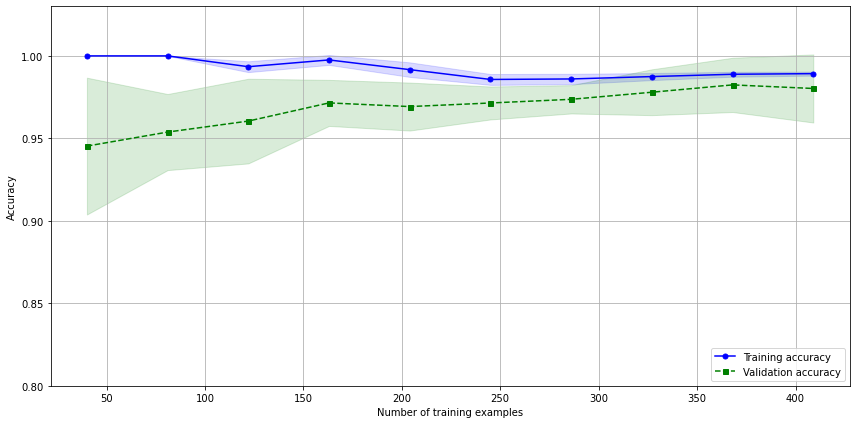

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           solver='lbfgs', max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(12,6))
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')


plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()